Import main libraries for the task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

Let's make some useful functions.

In [3]:
def data_info(table):
    table.info(memory_usage='deep')
    display(table)

def compare(elem1,elem2,name):
    if elem1>=elem2:
        return print("Model "+name+" is accurate with accuracy: "+str(elem1))
    else:
        return print("Model "+name+" is not accurate enough with accuracy: "+str(elem1))

def hypotesis(alpha,table1,column1,table2,column2):
    alphax = alpha 
    results = st.ttest_ind(table1[column1], table2[column2])
    print('p-value:',results.pvalue)
    if ((results.pvalue) < alphax):
          print("Reject a hypothesis about equality of two samples "+column1)
    else:
          print("Do not reject a hypothesis about equality of two samples "+column1)

In [4]:
df_open = pd.read_csv('C:/Users/OB/Desktop/projects_to_do/datasets/1_users_behavior.csv')
df = df_open.drop(['calls'], axis=1)
data_info(df_open)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Let's look at coorelation. Let's delete is_ultra (nominal value) and calls (way to big corr with munutes).

,minutes,messages,mb_used
minutes,1.000000,0.173110,0.280967
messages,0.173110,1.000000,0.195721
mb_used,0.280967,0.195721,1.000000


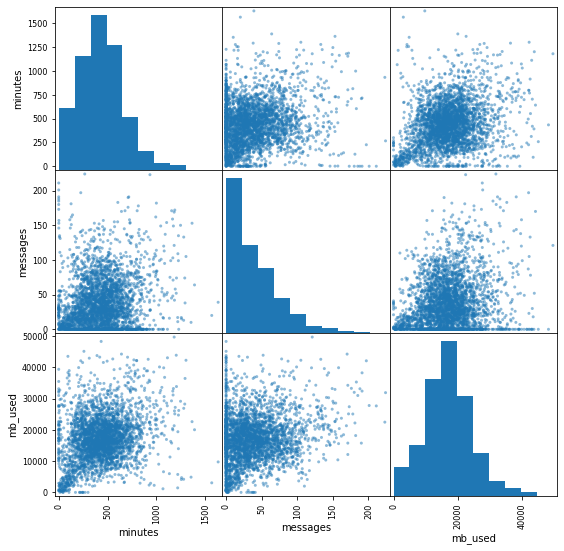

In [5]:
df_corr = df.drop(['is_ultra'], axis=1)
display(df_corr.corr())
pd.plotting.scatter_matrix(df_corr, figsize=(9, 9))
plt.show()

Let's make two dataframes with two tariffs and check sample equality hypotesis.

In [6]:
df_ultra = df.loc[(df['is_ultra'] == 1)].copy()
df_smart = df.loc[(df['is_ultra'] == 0)].copy()
hypotesis(.05,df_ultra,'minutes',df_smart,'minutes')
hypotesis(.05,df_ultra,'messages',df_smart,'messages')
hypotesis(.05,df_ultra,'mb_used',df_smart,'mb_used')
display(df_ultra)
display(df_smart)

p-value: 1.9859674390897966e-32
Reject a hypothesis about equality of two samples minutes
p-value: 1.7346624732133354e-31
Reject a hypothesis about equality of two samples messages
p-value: 6.16068229213208e-30
Reject a hypothesis about equality of two samples mb_used


,minutes,messages,mb_used,is_ultra
3,745.53,81.0,8437.39,1
6,431.64,20.0,3738.90,1
8,43.39,3.0,2538.67,1
10,560.51,20.0,9619.53,1
14,587.90,0.0,14406.50,1
...,...,...,...,...
3201,419.42,59.0,5177.62,1
3203,390.39,85.0,30550.30,1
3208,1016.98,71.0,17787.52,1
3209,910.98,20.0,35124.90,1


,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
4,418.74,1.0,14502.75,0
5,344.56,21.0,15823.37,0
...,...,...,...,...
3206,586.51,54.0,14345.74,0
3207,92.39,2.0,4299.25,0
3210,190.36,0.0,3275.61,0
3211,634.44,70.0,13974.06,0


Let's split the sample:

- test (20%);
- valid (20%);
- train (60%).
        

In [7]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)

In [8]:
df_test, df_valid = train_test_split(df_valid, test_size=0.5, random_state=12345)

In [9]:
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']

test_features = df_test.drop(['is_ultra'], axis=1)
test_target = df_test['is_ultra']

valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

display(df_train.shape)
display(df_test.shape)
display(df_valid.shape)

(1928, 4)

(643, 4)

(643, 4)

### Decision Tree Classifier

In [10]:
dec_range1 = 1
dec_range2 = 15
for i in range(dec_range1,dec_range2+1):
    dec_tree_model = DecisionTreeClassifier(random_state=12345,max_depth = i)
    dec_tree_model.fit(train_features,train_target)
    dec_tree_predict = dec_tree_model.predict(valid_features)
    dec_tree_accuracy = accuracy_score(valid_target, dec_tree_predict)
    print('max_depth = ',i,":",dec_tree_accuracy)

dec_tree_model_final = DecisionTreeClassifier(random_state=12345,max_depth = 8)

dec_tree_model_final.fit(train_features, train_target)
pred1 = dec_tree_model_final.predict(test_features)
acc1 = accuracy_score(test_target, pred1)
print('Test accuracy for Decision Tree Classifier =',acc1)

max_depth =  1 : 0.7356143079315708
max_depth =  2 : 0.7744945567651633
max_depth =  3 : 0.7791601866251944
max_depth =  4 : 0.7807153965785381
max_depth =  5 : 0.7884914463452566
max_depth =  6 : 0.776049766718507
max_depth =  7 : 0.7962674961119751
max_depth =  8 : 0.7807153965785381
max_depth =  9 : 0.7838258164852255
max_depth =  10 : 0.7713841368584758
max_depth =  11 : 0.7682737169517885
max_depth =  12 : 0.7589424572317263
max_depth =  13 : 0.7542768273716952
max_depth =  14 : 0.7433903576982893
max_depth =  15 : 0.7387247278382582
Test accuracy for Decision Tree Classifier = 0.7744945567651633


### Random Tree Classifier

In [11]:
rand_range1 = 1
rand_range2 = 15
for i in range(rand_range1,rand_range2+1):
    rand_tree_model = RandomForestClassifier(random_state=12345,max_depth = i,n_estimators = 10, criterion='gini')
    rand_tree_model.fit(train_features,train_target)
    rand_tree_predict = rand_tree_model.predict(valid_features)
    rand_tree_accuracy_depth = accuracy_score(valid_target, rand_tree_predict)
    print('max_depth = ',i,":",rand_tree_accuracy_depth)

rand_est1 = 1
rand_est2 = 15
max_depth_opt = 9
for i in range(rand_est1,rand_est2+1):
    rand_tree_model = RandomForestClassifier(random_state=12345,max_depth = max_depth_opt,n_estimators = i, criterion='gini')
    rand_tree_model.fit(train_features,train_target)
    rand_tree_predict = rand_tree_model.predict(valid_features)
    rand_tree_accuracy_est = accuracy_score(valid_target, rand_tree_predict)
    print('n_estimators = ',i,":",rand_tree_accuracy_est)

rand_tree_model_final = RandomForestClassifier(random_state=12345,n_estimators = 8,max_depth = 9)

rand_tree_model_final.fit(train_features, train_target)
pred2 = rand_tree_model_final.predict(test_features)
acc2 = accuracy_score(test_target, pred2)
print('Test accuracy for Random Tree Classifier =',acc2)

max_depth =  1 : 0.7200622083981337
max_depth =  2 : 0.7651632970451011
max_depth =  3 : 0.7807153965785381
max_depth =  4 : 0.7776049766718507
max_depth =  5 : 0.7791601866251944
max_depth =  6 : 0.7931570762052877
max_depth =  7 : 0.80248833592535
max_depth =  8 : 0.8087091757387247
max_depth =  9 : 0.8055987558320373
max_depth =  10 : 0.7916018662519441
max_depth =  11 : 0.7993779160186625
max_depth =  12 : 0.7993779160186625
max_depth =  13 : 0.7962674961119751
max_depth =  14 : 0.7931570762052877
max_depth =  15 : 0.7916018662519441
n_estimators =  1 : 0.76049766718507
n_estimators =  2 : 0.7651632970451011
n_estimators =  3 : 0.7791601866251944
n_estimators =  4 : 0.7791601866251944
n_estimators =  5 : 0.7916018662519441
n_estimators =  6 : 0.80248833592535
n_estimators =  7 : 0.8040435458786936
n_estimators =  8 : 0.8009331259720062
n_estimators =  9 : 0.8055987558320373
n_estimators =  10 : 0.8055987558320373
n_estimators =  11 : 0.8009331259720062
n_estimators =  12 : 0.796267

### Logistic Regression

In [12]:
logistic_model = LogisticRegression(random_state=12345,solver='liblinear')
logistic_model.fit(train_features, train_target)

logistic_prediction = logistic_model.predict(valid_features)
logistic_accuracy = accuracy_score(valid_target, logistic_prediction)

print('Valid accuracy for logistic regression =',logistic_accuracy)

logistic_model_final = LogisticRegression(random_state=12345,solver='liblinear')

logistic_model_final.fit(train_features, train_target)
pred3 = logistic_model_final.predict(test_features)
acc3 = accuracy_score(test_target, pred3)
print('Test accuracy for logistic regression =',acc3)

Valid accuracy for logistic regression = 0.6982892690513219
Test accuracy for logistic regression = 0.7076205287713841


In [13]:
comp = df['is_ultra'].value_counts() / df.shape[0]
is_ultra_zero_percent = comp[0]

compare(acc1,is_ultra_zero_percent,"Decision Tree Classifier")
compare(acc2,is_ultra_zero_percent,"Random Tree Classifier")
compare(acc3,is_ultra_zero_percent,"Logistic Regression")

Model Decision Tree Classifier is accurate with accuracy: 0.7744945567651633
Model Random Tree Classifier is accurate with accuracy: 0.7869362363919129
Model Logistic Regression is accurate with accuracy: 0.7076205287713841
